In [ ]:
"""
Try stuff for Georgia
"""

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib qt5

QStandardPaths: error creating runtime directory '/run/user/2784' (Permission denied)


In [3]:
inputpath = '/data/cburgard/FOR_GEORGIA/'

In [11]:
data_1deg = xr.open_dataset(inputpath + 'NEMO_1degree/n42openc_00910101_01001231_1Y_grid_T.nc').mean('time_counter')
data_025deg = xr.open_dataset(inputpath + 'NEMO_025degree/MJ2023_eORCA025.L121-OPM026_y1989.30y_gridT_timmean.nc').squeeze().drop('time_counter')

In [12]:
#mask_ocean = data_1deg['so'] > 0
mask_ocean = data_025deg['vosaline'] > 0

In [21]:
mask_ocean.isel(deptht=50).plot()

libGL error: No matching fbConfigs or visuals found
libGL error: failed to load driver: swrast


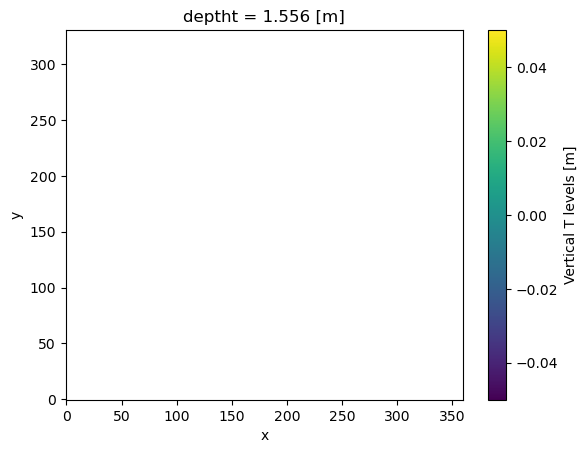

In [19]:
mask_ocean.deptht.where(mask_ocean - mask_ocean.shift(deptht=1) != 0).isel(deptht=1).plot()

In [30]:
# masque là où il y a de l'océan
#mask_ocean = data_1deg['so'] > 0
mask_ocean = data_025deg['vosaline'] > 0

# exemple pour un point sous un ice shelf
#col_test = mask_ocean.sel(x=232,y=24)
col_test = mask_ocean.sel(x=912,y=167)

# shifter le masque d'un point sur la verticale et faire une différence avec le masque originale 
# si 1 ou -1, changement de non-océan à océan
vert_diff_plus = (col_test - col_test.shift(deptht=1)).isel(deptht=range(1,len(col_test.deptht)))
vert_diff_minus = (col_test - col_test.shift(deptht=-1)).isel(deptht=range(1,len(col_test.deptht)))

# dernier point d'océan avant la glace
ice_depth = col_test.deptht.where(vert_diff_plus == 1, drop=True)
# dernier point d'océan avant le fond
bot_depth = col_test.deptht.where(vert_diff_minus == 1, drop=True)

In [29]:
mask_ocean.isel(deptht=50).plot()

In [34]:
col_test.plot()
plt.axvline(x=ice_depth)
plt.axvline(x=bot_depth)

In [35]:
# pour tous les points
vert_diff_plus_all = (mask_ocean - mask_ocean.shift(deptht=1)).isel(deptht=range(1,len(mask_ocean.deptht)))
vert_diff_minus_all = (mask_ocean - mask_ocean.shift(deptht=-1)).isel(deptht=range(1,len(mask_ocean.deptht)))

In [42]:
# dernier point d'océan avant la glace - somme de toutes les profondeurs où la différence est positive (donc la transition glace-océan)
ice_depth_all = (mask_ocean.deptht * vert_diff_plus_all).where(vert_diff_plus_all > 0).sum('deptht').astype('float')
# dernier point d'océan avant le fond - somme de toutes les profondeurs où la différence est positive (donc la transition océan-fond)
bot_depth_all = (mask_ocean.deptht * vert_diff_minus_all).where(vert_diff_minus_all > 0).sum('deptht').astype('float')

In [73]:
ice_depth_all = ice_depth_all.where(ice_depth_all > 0,0)

In [45]:
bot_depth_all.plot()

In [41]:
((mask_ocean.deptht * vert_diff_plus_all) > 1)

<xarray.DataArray (deptht: 120, y: 1207, x: 1442)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * deptht   (deptht) float32 1.526 2.638 3.84 ... 5.494e+03 5.698e+03 5.902e+03
    nav_lon  (y, x) float32 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nav_lat  (y, x) float32 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: y, x

In [82]:
data_1deg['so'].where((ice_depth_all > 0) & mask_ocean).max('deptht').plot()

In [71]:
data_1deg['so'].where(data_1deg['so'].(deptht=ice_depth_all)

KeyError: "not all values found in index 'deptht'"

In [70]:
bot_depth_all.plot()

In [53]:
col_test.plot()
plt.axvline(x=ice_depth)
plt.axvline(x=bot_depth)

In [39]:
bot_depth

<xarray.DataArray 'deptht' (deptht: 0)>
array([], dtype=float32)
Coordinates:
    nav_lat  float32 -81.67
    nav_lon  float32 -56.57
  * deptht   (deptht) float32 
Attributes:
    name:       deptht
    long_name:  Vertical T levels
    units:      m
    positive:   down
    bounds:     deptht_bounds